# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [23]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# read the data
dataframe = pd.read_csv('foodhub_order.csv')
df=dataframe.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [26]:
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the given dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [27]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   All the columns have 1898 observations indicating that there are no missing values in them
*   The restaurant_name, cuisine_type, day_of_the_week columns are being read as a 'object' data type which is expected as they are strings
*   The rating column is being read as object data type which is unexpected since it should ideally be an integer or float, this may require further investigation and processing before data processing using this column
*   order_id and customer_id are integers and since they are likely unique primary keys, this is the expected data type for them
*   cost_of_the_order is a float which is valid data type for price
*   food_preparation_time and delivery_time are integers and since they are in minutes, an integer is a valid data type for these columns


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [28]:
df.isnull().count()

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1898
food_preparation_time    1898
delivery_time            1898
dtype: int64

In [29]:
df.isna().count()

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1898
food_preparation_time    1898
delivery_time            1898
dtype: int64

#### Observations:

There is no missing data or NA values since the count of each columns matches the number of rows.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [31]:
print('Minimum food preparation time is',df['food_preparation_time'].min(),'mins')

print('Average food preparation time is', round(df['food_preparation_time'].mean(),2),'mins')

print('Maximum food preparation time is',df['food_preparation_time'].max(),'mins')

Minimum food preparation time is 20 mins
Average food preparation time is 27.37 mins
Maximum food preparation time is 35 mins


#### Observations:

Average food preparation time is 27.37 mins
Maximum food preparation time is 35 mins

*   Minimum food preparation time is 20 mins
*   Average food preparation time is 27.37 mins
*   Maximum food preparation time is 35 mins



### **Question 5:** How many orders are not rated? [1 mark]

In [32]:
# Write the code here
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [33]:
df['rating'].value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

# Observations
*   736 orders have not been rated
*   The total perecentage of orders not been rated is 38.78, which is significant



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [44]:
#@title Column 1: order_id
print(df['order_id'].value_counts().count(), 'unique orders')

print(df['order_id'].count(), 'orders')

1898 unique orders
1898 orders


In [45]:
#@title Column 2: customer_id
print(df['customer_id'].value_counts().count(), 'unique customers')

print(df['customer_id'].count(), 'customers')

1200 unique customers
1898 customers


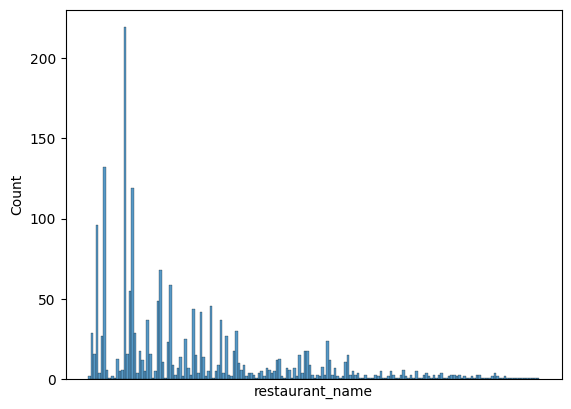

178 restaurants in dataset
----------------------------------------------------------------


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

In [46]:
#@title Column 3: restaurant_name
sns.histplot(data=df,x='restaurant_name')
plt.xticks([])  # Disable xticks as restaurant names are too many, can deep dive to check distribution further using value_counts
plt.show()

print(df['restaurant_name'].value_counts().count(), 'restaurants in dataset')
print('----------------------------------------------------------------')
df['restaurant_name'].value_counts()

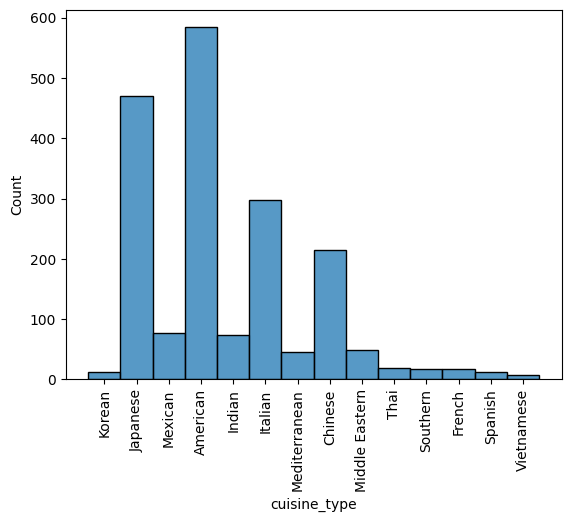

14 cuisines in dataset
----------------------------------------------------------------


cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

In [47]:
# @title Column 4: cuisine_type

# Plot a histogram depicting the cuisine types
sns.histplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

print(df['cuisine_type'].value_counts().count(), 'cuisines in dataset')
print('----------------------------------------------------------------')
df['cuisine_type'].value_counts()

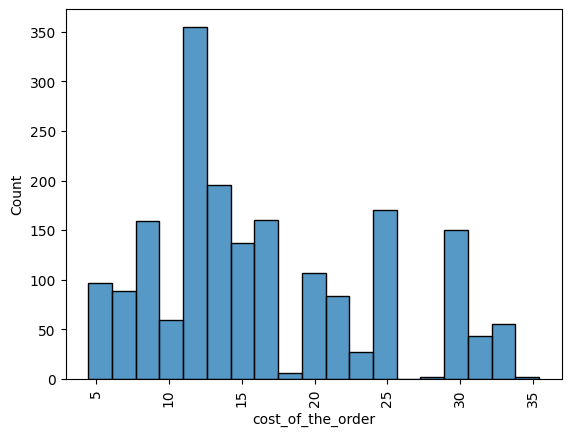

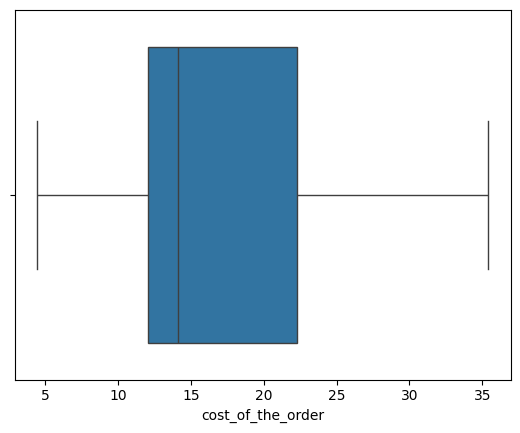

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

In [48]:
# @title Column 5: cost_of_the_order
sns.histplot(data=df,x='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

df['cost_of_the_order'].describe().T


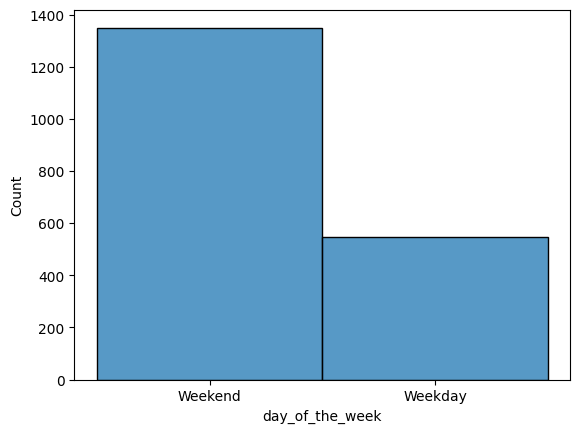

day_of_the_week
Weekend    0.711802
Weekday    0.288198
Name: proportion, dtype: float64

In [49]:
# @title Column 6: day_of_the_week
sns.histplot(data=df,x='day_of_the_week')
plt.show()

df['day_of_the_week'].value_counts(normalize='True')

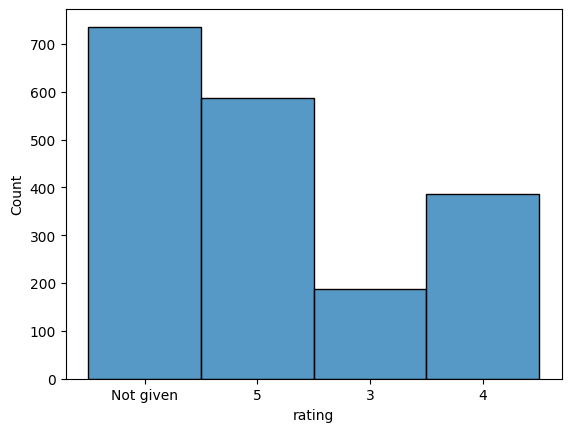

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

In [50]:
# @title Column 7: rating
sns.histplot(data=df,x='rating')
#plt.xticks(rotation=90)
plt.show()

df['rating'].describe().T

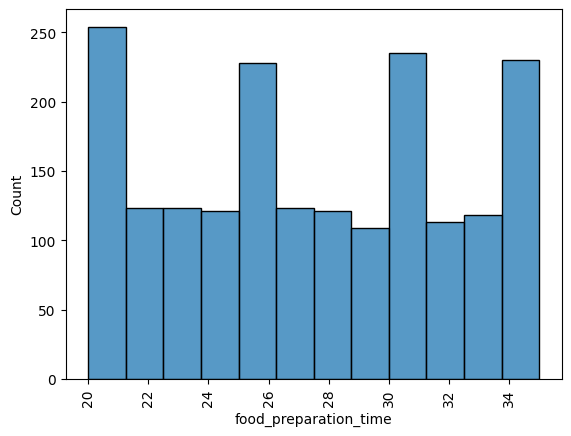

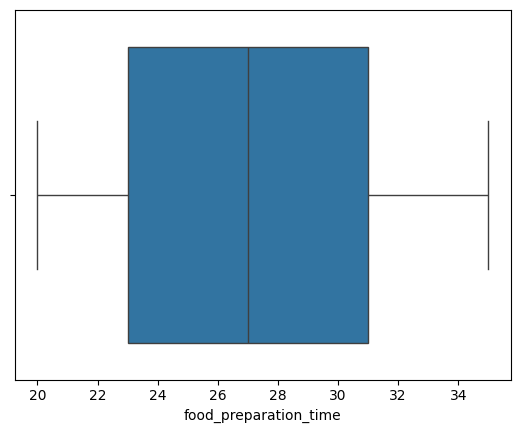

In [51]:
#@title Column 8: food_preparation_time
sns.histplot(data=df,x='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

df['food_preparation_time'].describe()

sns.boxplot(data=df,x='food_preparation_time', showfliers = True)
plt.show()

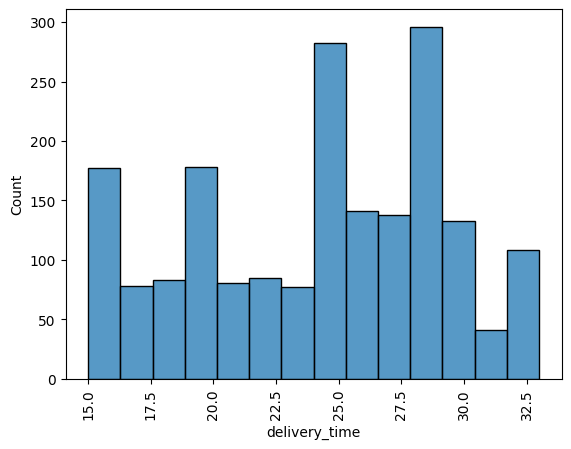

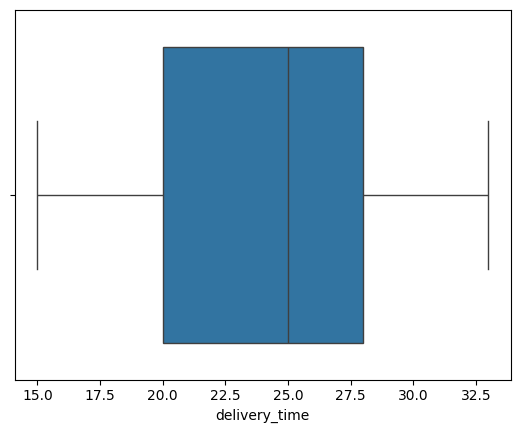

In [52]:
# @title Column 9: delivery_time
sns.histplot(data=df,x='delivery_time')
plt.xticks(rotation=90)
plt.show()

df['delivery_time'].describe()

sns.boxplot(data=df,x='delivery_time', showfliers = True)
plt.show()

Summary from all the plots and key observations on the different variables (columns) are as follows:
* order_id is the primary key with 1898 distinct orders
* There are 1200 distinct customers in the data set. Each of the 1898 orders is associated with a customer.
* The dataset comprises of 178 restaurants. Shake Shack and Meatball Shop are the most popular. The plot shows how varying the popularity distibution of restaurants is.
* 14 cuisines are in the dataset. American and Japanese are the most popular cuisines.
* Cost of orders range from 4.47 to 35.41, average cost is 16.5.
* Number of orders in weekends is more than double of the number on weekdays. Approximately 71.1% of orders are on weekends.
* A significant number of orders have not been rated. Distinct ratings are 3,4 and 5. Ignoring the orders that have not been rated, the highest number of orders have a rating of 5, followed by 4.
* Minimum food preparation time is 20 mins and maximum is 35 mins.
* Minimum delivery time is 15 mins and maximum is 33 mins.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [53]:
print(df.restaurant_name.value_counts().head(5))
print('--------------------------')
df.restaurant_name.value_counts(normalize=True)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64
--------------------------


restaurant_name
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: proportion, Length: 178, dtype: float64

#### Observations:
*  We see that the most popular restaurant is Shake Shack with 219 orders from here accounting for 11.5% of the orders.
*   The top 5 restaurants and number of orders are as follows:
1. Shake Shack  - 219
2. The Meatball Shop - 132
3. Blue Ribbon Sushi - 119
4. Blue Ribbon Fried Chicken - 96
5. Parm - 68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [54]:
df['cuisine_type'].loc[df['day_of_the_week']=='Weekend'].count()

df['cuisine_type'].loc[df['day_of_the_week']=='Weekend'].value_counts()
# df['cuisine_type'].loc[df['day_of_the_week']=='Weekday'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
American is the most popular cuisine on weekends, with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [55]:
# Count of orders with cost > 20/ Total cost of all orders * 100 , round it to 2 decimal places
round(df['order_id'].loc[df['cost_of_the_order']>20].count()/df['order_id'].count()*100,2)

29.24

#### Observations:
29.24% of orders cost more than 20 dollars. This is less than half the orders.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [56]:
round(df['delivery_time'].mean(),2)


24.16

#### Observations:
Average order delivery time is 24.16 mins


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [57]:
df.groupby(['customer_id'])['customer_id'].count().sort_values(ascending=False).head(10)


customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
82041      7
259341     7
276192     7
60052      6
115213     6
Name: customer_id, dtype: int64

#### Observations:
The top customer is customer_id 52832 with 13 orders.

---


The following customers have the top 5 number of visits.
* 52832 with 13 visits
* 47440  with 10 visits
* 83287  with 9 visits
* 250494 with 8 visits
* 65009 with 7 visits
* 82041 with 7 visits
* 259341 with 7 visits
* 276192 with 7 visits


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [58]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


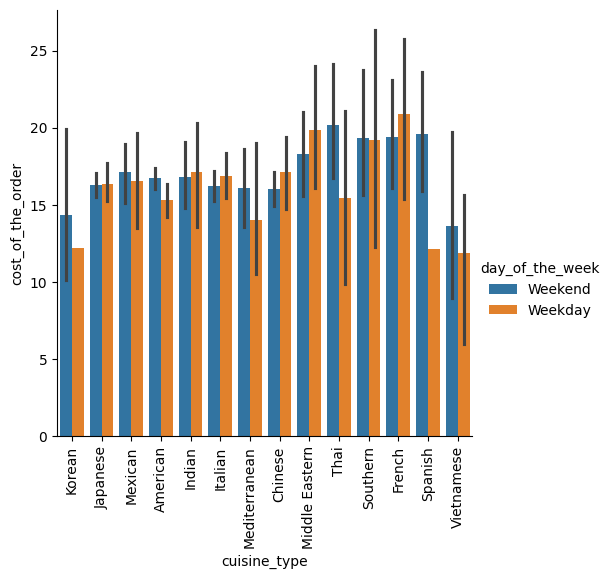

In [59]:
#@title Cuisine type and cost on weekend/weekdays
sns.catplot(x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week', data=df, kind="bar")
plt.xticks(rotation=90)
plt.show()


# Observations
* Cost of orders does not seem to be tied up on the day of week.
* For some cuisines like Thai and Spanish, the deviation between weekday and weekend is more, so can investigate other factors on preference for these more on weekends, like time to prepare order may be longer?
 French cuisine seems to be most expensive. Since count by earlier analysis shows that it is not popular and yet the cost is higher than American, it generates more revenue due to the high cost.
* Korean and Vietnamese are showing least costs, but this could be due to the factors like them being least popular as seen in earlier analysis


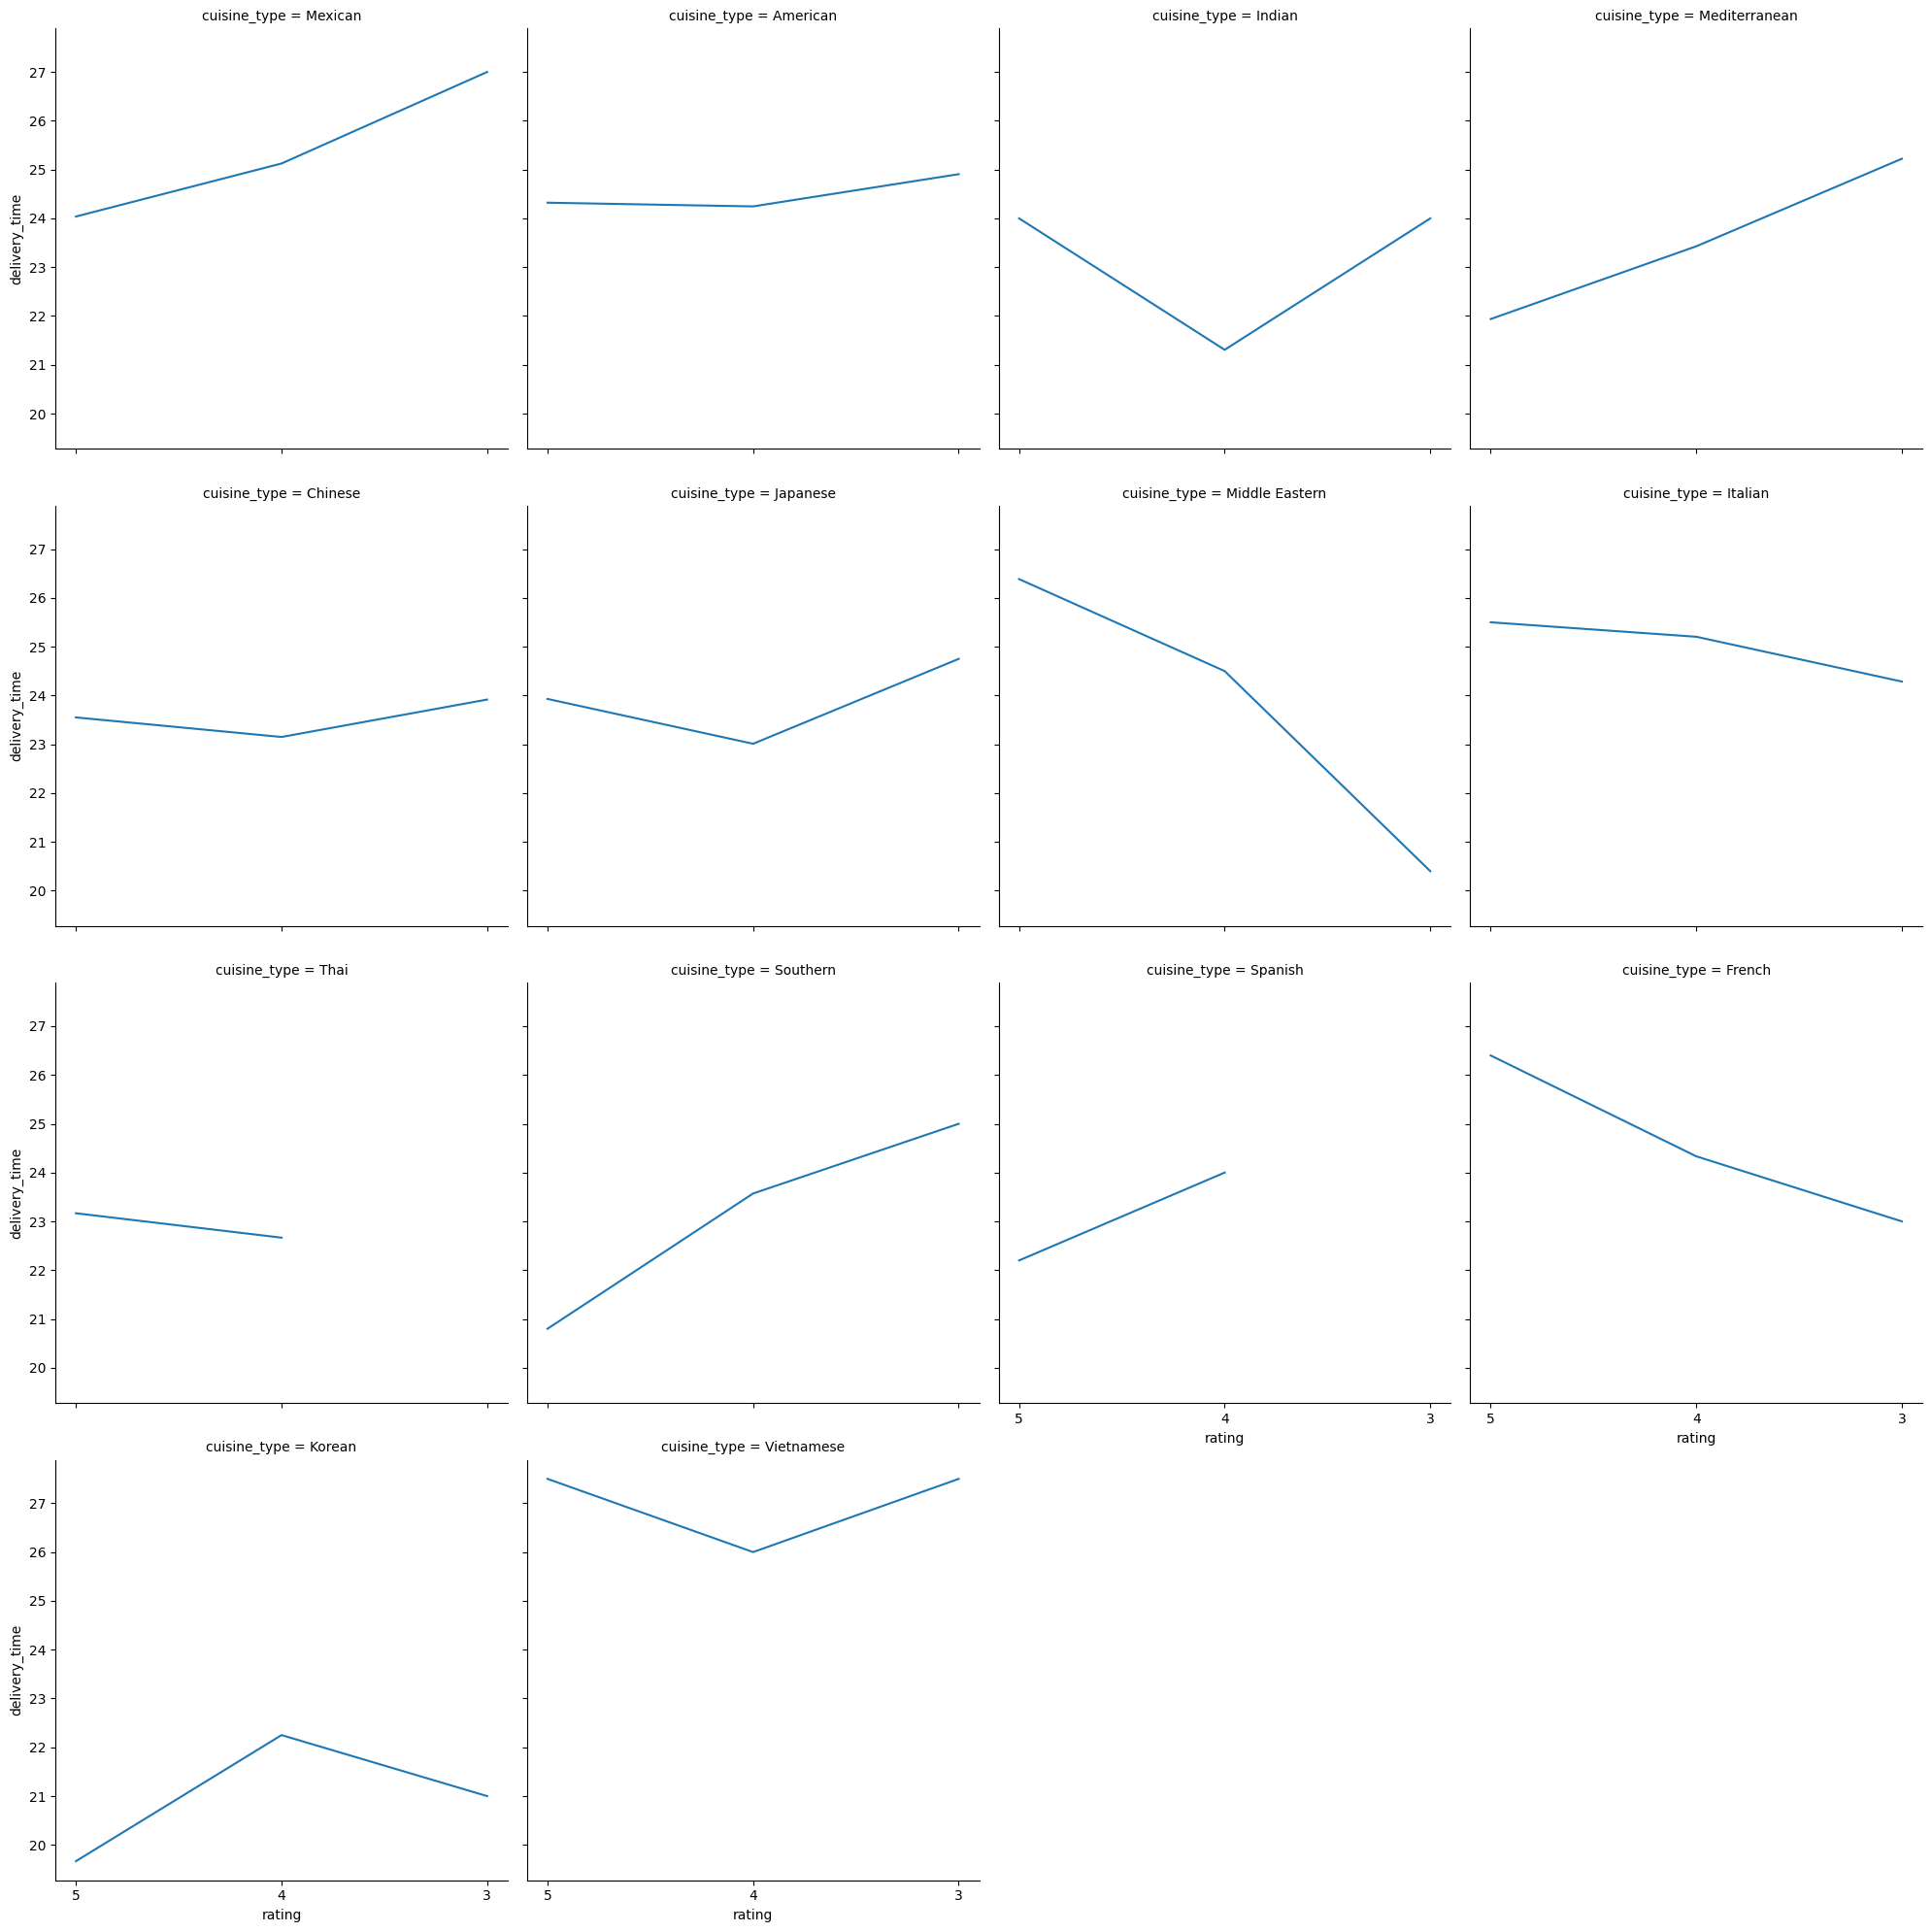

In [60]:
#@title Rating vs delivery_time for different cuisines
#Disregard cuisines that have not been rated
df_rated = df.loc[df['rating']!='Not given'].copy()
sns.relplot(data=df_rated,x='rating',y='delivery_time',col='cuisine_type',kind='line', errorbar=None, col_wrap=4)
plt.show()
# double click on the plot to zoom in

# Observations
* Some cuisines show a trend that rating is high if delivery time is low (Southern, Mexican, Mediterranean, Spanish)
* The above pattern is not constant ascross cuisines and some have shown absolute opposite trend too (like French, Middle Eastern), so disregard delivery time as a factor that affects ratings
* American has a relatively flat delivery time, which may be a reason for its popularity as well as a cuisine due to prectability in delivery.

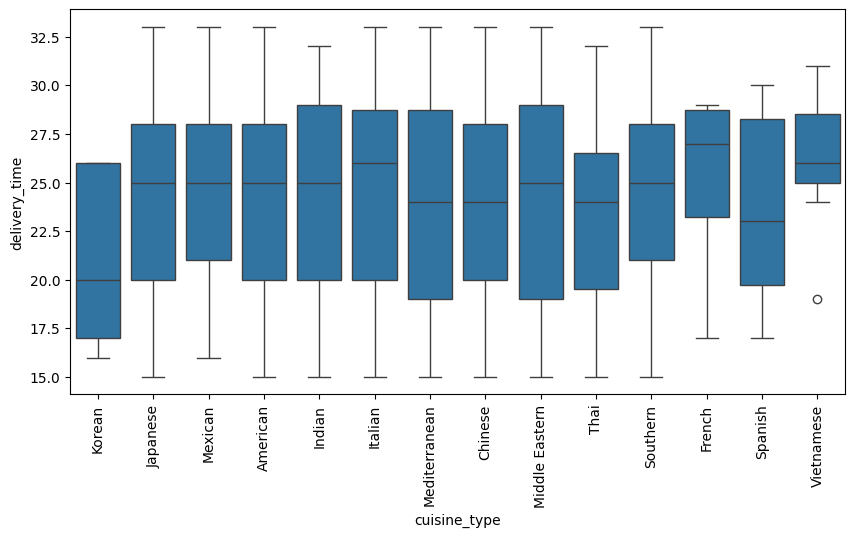

In [61]:
# @title Cuisine type vs Delivery_time
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type',y='delivery_time') # turning off outliers
plt.xticks(rotation=90)
plt.show()

# Observations
* Korean is the quickest to delivery with lowest minimum and maximum times, yet it is the least popular as seen in earlier analysis indicating delivery_time is not a factor in choosing to eat this cuisine
* Middle Eastern cuisine takes longer to deliver.Average time to deliver is highest in French cuisines, followed by Indian.

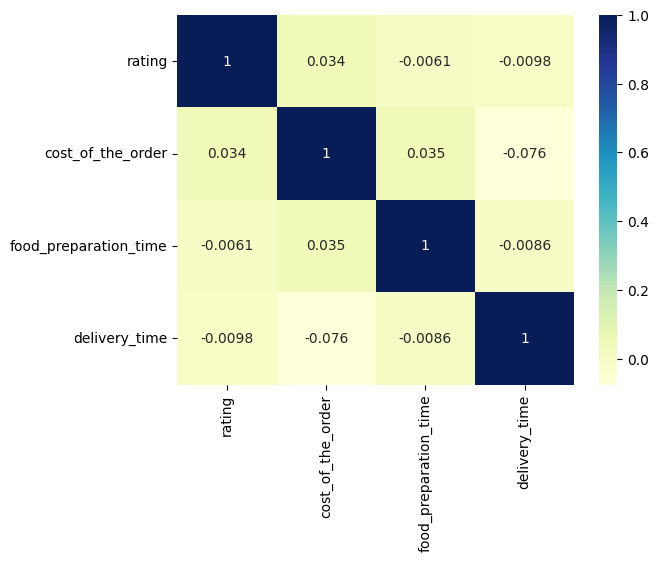

In [63]:
#@title Correlation of rating, cost_of_the_order, food_preparation_time, delivery_time

df_rated = df.loc[df['rating']!='Not given'].copy()
sns.heatmap(data=df_rated[['rating','cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, cmap='YlGnBu');

#Observations

We see that there really is no strong corelation between the numerical variables of rating, food order cost, order preparation time and delivery time.

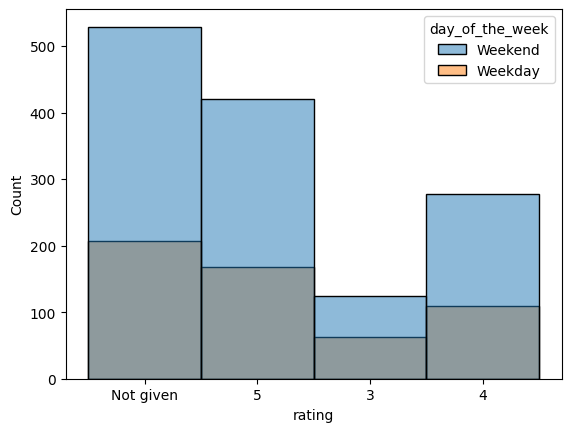

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

In [65]:
# @title Rating on varying day_of_week
sns.histplot(data=df,x='rating', hue='day_of_the_week')
#plt.xticks(rotation=90)
plt.show()

df['rating'].describe().T

# Observations
The proportion of ratings for each rating level (including the ones 'Not Given') is more on weekends than on weekdays

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [66]:
# What are the different ratings entered
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [67]:
# Filter data to exclude restaurants which have rating as "Not given" and check the data types
df_rated = df.loc[df['rating']!='Not given'].copy()
df_rated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 90.8+ KB


In [68]:
# Convert rating into integer/float
df_rated['rating'] = pd.to_numeric(df_rated['rating'])
df_rated.info()
df_rated['rating'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


array([5, 3, 4])

In [69]:
#Get the restaurants with ratings more than 50
df_50 = df_rated.loc[df_rated.groupby(['restaurant_name'])['rating'].transform('count') > 50].copy()
#df_50 = df_rated.loc[[df_rated.filter(df_rated.loc[df_rated.groupby(['restaurant_name'])['rating']('count') > 50].copy())['restaurant_name']['rating']]
df_50.groupby(['restaurant_name'])['rating'].transform('count')
df_50_clean= df_50.filter(['restaurant_name','rating'])
df_50_clean['restaurant_name'].unique()

array(['Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi',
       'The Meatball Shop'], dtype=object)

In [70]:
# Now get the average rating of these restaurants
df_50_clean.groupby(['restaurant_name'])['rating'].mean()

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations:
* The restaurants qualifying for the promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop.
* All the restaurants that have number of ratings more than 50 also have average rating > 4
* A signifincant percentage of restaurants with rating as "Not Given" were disregarded here

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [71]:
def charge(x):
    if x>20:
        x = 0.25*x
        return x
    elif x>5:
        x = 0.15*x
        return x
    else:
        x = 0
        return x

df['Net_Revenue'] = df['cost_of_the_order'].apply(charge)
df


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Net_Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


In [72]:
# Add the result to get the total revenue
round(df['Net_Revenue'].sum(),2)
#df['Net_Revenue'].sum()

6166.3

#### Observations:
The net revenue generated by the company is 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [73]:
# Create a new column for total time taken
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_slow_orders = df.loc[df['total_time'] > 60 ].copy()
row_count = len(df_slow_orders)
# print(row_count)
# df_slow_orders.count()
round(len(df_slow_orders)/len(df) * 100,2)

10.54

#### Observations:
* 10.54% of the orders taken more than an hour to fulfill.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [74]:
round(df.groupby(df['day_of_the_week'])['delivery_time'].mean(),2)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

#### Observations:
* There is a small variation between the delivery times on weekends or weekdays. Weekdays take a mean time of 28.34 minutes whereas weekends take 22.47 minutes.
* We can further analyze why it takes longer on weekdays, like staff availability, or traffic conditions to improve the time.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Observations on all plots have been documented below each plot, and throughout the Observations section of this document.
Some additional deductions or the key ones that stood out are listed below.
* We see that the dataset that is presented has a few numerical data that seems to be loosely co-related. So, in this case observation of each column in a univariate format has been leading to more useful insights. Please refer to the observations documented above to get a summary of this analysis.
* The most popular cuisines are American and Japanese.
* After ignoring the orders that have not been rated, we see that 5 is the most popular rating ensuring we are tied to a fairly good quality of restaurants
* Number of orders in weekends is more than double of the number on weekdays. Approximately 71.1% of orders are on weekends.
* The food preparation time and delivery times were observed and we saw that there were no outliers in this data.


### Recommendations:

* 10.5 % of orders are taking more than an hour to fulfil. We can analyze these 10% of orders to see if there is any factor that can help reduce this time so that business from these restaurants can be likely improved
* Number of missing ratings is signifincantly high. Maybe an incentive can be provided or the ease of providing ratings can be investigated, so that we get more feedback from customers to help better deductions.
* Since cost of orders are not tied to day_of _week,  but frequency of orders is more on weekends, we could vary the percentage amount based on day of week as well to offset the resources we spend for the heavy load on weekends with increased revenue.
* Gather more data to investigate the reason for popularity of certain cuisines, if it is based on availability of restaurants or is it the quality of restaurants, so we can maintain a goodproftable portfolio of client restaurants
* Since number of orders on weekends is significantly more, we can make sure we focus resource availaibility of drivers on weekends to ensure timely deliveries.
* In general, a lot of data provided is looseley co-related. It would be helpful to gather a dataset of statistics not based on orders as well, like number of restaurants of each cusine type, distance to key populated areas, demographic of potential customers. This additional data would provide helpful insights on the trends as they may provide better corelation to actual orders placed and revenue generated.




---